In [1]:
import os
import csv

# Directory path containing the text files
directory = "C:/Users/artem/mini_project/AD"

# Output CSV file path
dem_csv = "C:/Users/artem/mini_project/dem"


# Initialize an empty list to store the text entries
text_entries = []

# Iterate through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            content = file.read().strip()
            text_entries.append(content)

# Write the text entries to a CSV file
with open(dem_csv, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Text", "Label"])
    # Write each text entry with label "1" in a separate row
    for entry in text_entries:
        writer.writerow([entry, "1"])



In [2]:
import pandas as pd
dem_df = pd.read_csv(dem_csv)

print(dem_df)


                                                 Text  Label
0   ﻿λοιπον το βασικό μερη η τους η βασικη τους μέ...      1
1   ﻿άνθρωπος εδώ η κυρία με το καροτσάκι\nωραίο ε...      1
2   ﻿το παιδί είναι στο σκαμπό έχει σηκωθεί τα χέρ...      1
3   ﻿εδώ είναι μια κοπέλα η οποία έχει στο στόμα τ...      1
4   ﻿ πιάνει κάτι πράγματα Ναι να τα κατεβάσει κάτ...      1
..                                                ...    ...
61  ﻿λοιπόν το αγοράκι άνοιξε την το την πόρτα ας ...      1
62  ﻿ Αυτό το παιδάκι πολεμά να πιάσει εδώ το αυτό...      1
63  ﻿παιδί που ανέβασε να πάρει τζακ κάτι\n και έπ...      1
64  ﻿είναι δύο αδέρφια δυο παιδιά το παιδί έχει αν...      1
65  ﻿  βλέπω έναν να ανέβει επάνω σε ένα σκαμπό\n ...      1

[66 rows x 2 columns]


In [3]:
import os
import csv

# Directory path containing the text files
directory_nc = "C:/Users/artem/mini_project/Healthy"

# Output CSV file path
nc_csv = "C:/Users/artem/mini_project/nc"


# Initialize an empty list to store the text entries
text_entries = []

# Iterate through each file in the directory
for filename in os.listdir(directory_nc):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_nc, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            content = file.read().strip()
            text_entries.append(content)

# Write the text entries to a CSV file
with open(nc_csv, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Text", "Label"])
    # Write each text entry with label "1" in a separate row
    for entry in text_entries:
        writer.writerow([entry, "0"])



In [4]:
import pandas as pd
nc_df = pd.read_csv(nc_csv)

print(nc_df)


                                                 Text  Label
0   ﻿είμαστε στην κουζίνα ενός σπιτιού\n που ο μπα...      0
1   ﻿ βάζει κάτι στο στόμα ναι είναι ένα κοριτσάκι...      0
2   ﻿διότι είναι στην κουζίνα Όπου το περίεργο είν...      0
3   ﻿ένας πιτσιρικάς είναι σκαρφαλωμένος σε ένα σκ...      0
4   ﻿εδώ ένα αγόρι που έχει ανέβει επάνω στο σκαμπ...      0
5   ﻿ που να βλέπω α τι βλέπω α να τα πω προφορικά...      0
6   ﻿Λοιπόν η εικόνα αυτή δείχνει έναν άντρα έναν ...      0
7   ﻿λοιπόν εδώ στην πρώτη εικόνα βλέπω Παιδάκια μ...      0
8   ﻿είμαστε σε ένα σπίτι μέσα μία τετραμελής οικο...      0
9   ﻿ένα παιδάκι με πιπίλα ένα παιδάκι με γλυκά εί...      0
10  ﻿\n ένα παιδάκι κατεβάζει κάτι ένα\n σκυλάκι\n...      0
11  ﻿\n δηλαδή αυτό το χι ντι που λέτε\n τι βλέπω ...      0
12  ﻿ είναι ένας κύριος Μπορεί να είναι και ο μπαμ...      0
13  ﻿σε αυτή την εικόνα είναι ένα παιδάκι που προσ...      0
14  ﻿βλέπω ένα παιδάκι που προσπαθεί να πάρει να κ...      0
15  ﻿σε αυτή την εικόνα 

In [5]:
import pandas as pd
from sklearn.utils import resample


# Split the data into two separate DataFrames based on the label
dementia_samples = dem_df[dem_df['Label'] == 1]
healthy_samples = nc_df[nc_df['Label'] == 0]

# Upsample the healthy class to match the number of samples in the dementia class
upsampled_healthy = resample(healthy_samples,
                             replace=True,  # Sample with replacement
                             n_samples=len(dementia_samples),  # Match the number of samples in the dementia class
                             random_state=42)  # Set a random state for reproducibility

# Concatenate the upsampled healthy samples with the dementia samples
upsampled_data = pd.concat([dementia_samples, upsampled_healthy])

# Check the class distribution
print(upsampled_data['Label'].value_counts())
print(upsampled_healthy)

1    66
0    66
Name: Label, dtype: int64
                                                 Text  Label
38  ﻿βλεπω τον κύριο που πλένει τα πιάτα σκουπίζει...      0
28  ﻿το μπαμπά που πλύνει τα πιάτα Με αδέξιο τρόπο...      0
14  ﻿βλέπω ένα παιδάκι που προσπαθεί να πάρει να κ...      0
42  ﻿ένα σκύλο ένα παιδάκι δύο παιδιά και ένα κείν...      0
7   ﻿λοιπόν εδώ στην πρώτη εικόνα βλέπω Παιδάκια μ...      0
..                                                ...    ...
25  ﻿ Εδώ είμαστε στο χώρο μιας κουζίνας\n έχει έν...      0
33  ﻿Λοιπόν θα πω ενα παιδάκι πάλι αγόρι είναι αυτ...      0
9   ﻿ένα παιδάκι με πιπίλα ένα παιδάκι με γλυκά εί...      0
35  ﻿Πατέρας πλένει πιάτα η μάνα από το παράθυρο φ...      0
13  ﻿σε αυτή την εικόνα είναι ένα παιδάκι που προσ...      0

[66 rows x 2 columns]


In [6]:
dementia_nc_sample_60 = "C:/Users/artem/mini_project/dementia_nc_sample_60.csv"
dataset_part2 = pd.read_csv(dementia_nc_sample_60)

# Concatenate the two DataFrames
dataset = pd.concat([upsampled_data, dataset_part2])

print(dataset)
print(dataset.shape)

#turn dataframe into a csv 
dataset.to_csv('dataset.csv', index=False)



                                                 Text  Label
0   ﻿λοιπον το βασικό μερη η τους η βασικη τους μέ...      1
1   ﻿άνθρωπος εδώ η κυρία με το καροτσάκι\nωραίο ε...      1
2   ﻿το παιδί είναι στο σκαμπό έχει σηκωθεί τα χέρ...      1
3   ﻿εδώ είναι μια κοπέλα η οποία έχει στο στόμα τ...      1
4   ﻿ πιάνει κάτι πράγματα Ναι να τα κατεβάσει κάτ...      1
..                                                ...    ...
55  γεια σας αυτό που βλέπω στην εικόνα είναι την ...      0
56  ένας άντρας ο οποίος πλένει τα πιάτα ένα νιπτή...      0
57  είναι δύο αδερφάκια τα κοριτσάκια και ένα αγορ...      0
58  έχετε ένα λεπτό ο μπαμπάς πλένει τα πιάτα η μα...      0
59  ένας άντρας ο οποίος καθαρίζει πιάτο το πιάτο ...      0

[192 rows x 2 columns]
(192, 2)


In [7]:
# Check for duplicate index values
duplicates = dataset.index.duplicated()
print(duplicates)

num_duplicates = duplicates.sum()
print("Number of duplicate index values:", num_duplicates)

# resetting indexes 
dataset = dataset.reset_index(drop=True)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [8]:
#semipreprocessed
import nltk
import string
from nltk.tokenize import word_tokenize


nltk.download('punkt')

# Function to remove punctuation from a text string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text

# Convert text to lowercase
dataset["Text"] = dataset["Text"].str.lower()

# Remove punctuation from the text
dataset["Text"] = dataset["Text"].apply(remove_punctuation)

# Tokenize the text in each row using the 'apply' function
dataset["Tokens"] = dataset["Text"].apply(word_tokenize)

# Print the tokens for the first row as an example
print(dataset["Tokens"].iloc[0])



['\ufeffλοιπον', 'το', 'βασικό', 'μερη', 'η', 'τους', 'η', 'βασικη', 'τους', 'μέριμνα', 'είναι', 'η', 'φροντίδα', 'του', 'εαυτού', 'τους', 'ο', 'ένας', 'τηλεφωνάει', 'ο', 'άλλος', 'θαυμάζει', 'τη', 'γυναίκα', 'του', 'που', 'κάνει', 'τη', 'δουλειά', 'που', 'γλίτωσε', 'το', 'κούρεμα', 'λοιπόν', 'πάμε', 'τι', 'θες', 'να', 'σου', 'πω', 'να', 'σου', 'περιγράψω', 'και', 'τα', 'παιδιά', 'προσπαθούν', 'να', 'διασκεδάσουν', 'αυτους', 'με', 'τις', 'με', 'τα', 'βρίσκοντας', 'που', 'είναι', 'τα', 'γλυκά', 'και', 'τρώγοντας', 'τα', 'τα', 'γλυκα', 'λοιπόν', 'τι', 'θα', 'γίνει', 'όταν', 'θα', 'γυρίσει', 'μέσα', 'η', 'γυναίκα', 'και', 'θα', 'του', 'πει', 'να', 'σφουγγαρίσει', 'και', 'και', 'θα', 'της', 'πει', 'αυτός', 'αυτή', 'είναι', 'δικιά', 'σου', 'δουλειά', 'δεν', 'είναι', 'δικά', 'μου', 'και', 'θα', 'γίνει', 'το', 'έλα', 'να', 'δεις', 'λοιπον', 'το', 'σκυλί', 'και', 'έχουμε', 'και', 'ένα', 'σκυλί', 'εδώ', 'που', 'τρώει', 'τα', 'αποφάγια', 'των', 'φυσιολογικά', 'φυσιολογικό', 'σκυλι', 'προφανως', 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\artem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
import pandas as pd
import random
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction

# blue score calculation 

dataset['bleu_score'] = None  # Create a new column 'bleu_score' and initialize with None

# Set a seed for randomization
random.seed(42)

# Select a single reference text (sample with label 0)
reference_indices = dataset[dataset['Label'] == 0]['Tokens'].index
reference_index = random.choice(reference_indices)
reference_tokens = dataset.loc[reference_index, 'Tokens']
reference_text = dataset.loc[reference_index, 'Text']

#reference_text = dataset.loc[172, 'Tokens']

# Create a smoothing function
smoothing = SmoothingFunction()

# Iterate over the DataFrame rows
for index, row in dataset.iterrows():
    if row['Label'] == 1:
        demented_tokens = row['Tokens']

        # Calculate BLEU score with smoothing
        bleu_score = corpus_bleu([reference_tokens], [demented_tokens], smoothing_function=smoothing.method1)

        # Update the 'bleu_score' column with the calculated score
        dataset.at[index, 'bleu_score'] = float(bleu_score) #float was added bc an error occured latter when trying to run models
        
    elif row['Label'] == 0:
        healthy_tokens = row['Tokens']

        # Calculate BLEU score with smoothing for label 0
        bleu_score2 = corpus_bleu([reference_tokens], [healthy_tokens], smoothing_function=smoothing.method1)

        dataset.at[index, 'bleu_score'] = float(bleu_score2)

# Print the updated DataFrame
print(dataset[['Label', 'bleu_score']])

#rouge score calculation 
from rouge import Rouge

dataset['rouge_1'] = None
dataset['rouge_2'] = None
dataset['rouge_L'] = None

# Create a Rouge object
rouge = Rouge()
# Iterate over the DataFrame rows
for index, row in dataset.iterrows():
    if row['Label'] == 1:
        demented_text = row['Text']
        
        # Calculate the ROUGE scores for demented text
        scores_demented = rouge.get_scores(demented_text, reference_text)

        # Update the respective columns with the calculated scores for demented text
        dataset.at[index, 'rouge_1'] = scores_demented[0]['rouge-1']['f']
        dataset.at[index, 'rouge_2'] = scores_demented[0]['rouge-2']['f']
        dataset.at[index, 'rouge_L'] = scores_demented[0]['rouge-l']['f']

    elif row['Label'] == 0:
        healthy_text = row['Text']
        
        # Calculate the ROUGE scores for healthy text
        scores_healthy = rouge.get_scores(healthy_text, reference_text)

        # Update the respective columns with the calculated scores for healthy text
        dataset.at[index, 'rouge_1'] = scores_healthy[0]['rouge-1']['f']
        dataset.at[index, 'rouge_2'] = scores_healthy[0]['rouge-2']['f']
        dataset.at[index, 'rouge_L'] = scores_healthy[0]['rouge-l']['f']

# Print the updated DataFrame
print(dataset[['Label', 'bleu_score', 'rouge_1', 'rouge_2', 'rouge_L']])
print(dataset["bleu_score"])
print(dataset['bleu_score'].dtype)


     Label bleu_score
0        1     0.0008
1        1   0.003825
2        1    0.00056
3        1   0.002318
4        1   0.001363
..     ...        ...
187      0   0.001712
188      0   0.004361
189      0   0.003093
190      0    0.00357
191      0   0.002156

[192 rows x 2 columns]
     Label bleu_score   rouge_1   rouge_2   rouge_L
0        1     0.0008  0.193878   0.01875  0.112245
1        1   0.003825  0.181818  0.021505  0.103896
2        1    0.00056   0.14902  0.012848  0.109804
3        1   0.002318  0.235294  0.013333  0.156863
4        1   0.001363  0.243902      0.01  0.195122
..     ...        ...       ...       ...       ...
187      0   0.001712  0.296875  0.036145  0.140625
188      0   0.004361  0.309524  0.082474  0.214286
189      0   0.003093  0.247191       0.0   0.11236
190      0    0.00357  0.252632   0.05042  0.126316
191      0   0.002156  0.309278  0.015748  0.123711

[192 rows x 5 columns]
0        0.0008
1      0.003825
2       0.00056
3      0.002318


In [10]:
import numpy as np


higher_bleu_label_1 = dataset.loc[dataset['Label'] == 1, 'bleu_score'].max()
lower_bleu_label_0 = dataset.loc[dataset['Label'] == 0, 'bleu_score'].min()

#mean for bleu score healthy vs healthy
bleu_label_0 = dataset.loc[dataset['Label'] == 0, 'bleu_score']
mean_bleu_label_0 = np.mean(bleu_label_0)

#mean for bleu score healthy vs demented
bleu_label_1 = dataset.loc[dataset['Label'] == 1, 'bleu_score']
mean_bleu_label_1 = np.mean(bleu_label_1)


print("Higher BLEU score for label 1:", higher_bleu_label_1)
print("Lower BLEU score for label 0:", lower_bleu_label_0)
print("Mean BLEU score for label 0:", mean_bleu_label_0)
print("Mean BLEU score for label 1:", mean_bleu_label_1)



Higher BLEU score for label 1: 0.017033186037639283
Lower BLEU score for label 0: 0.0
Mean BLEU score for label 0: 0.002149153292907971
Mean BLEU score for label 1: 0.002866543033003299


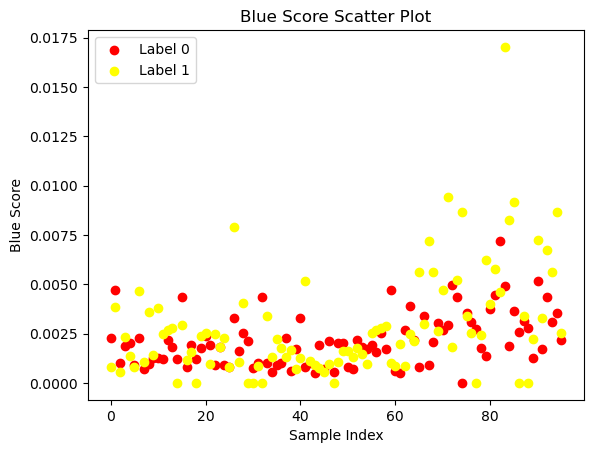

In [11]:
import matplotlib.pyplot as plt

# Filter rows with label == 0 and label == 1
# label_0_scores = dataset.loc[dataset['Label'] == 0, 'bleu_score']
# label_1_scores = dataset.loc[dataset['Label'] == 1, 'bleu_score']

# Create scatter plot
plt.scatter(range(len(bleu_label_0)), bleu_label_0, color='red', label='Label 0')
plt.scatter(range(len(bleu_label_1)), bleu_label_1, color='yellow', label='Label 1')

# Set plot title and labels
plt.title('Blue Score Scatter Plot')
plt.xlabel('Sample Index')
plt.ylabel('Blue Score')

# Show legend
plt.legend()

# Show the plot
plt.show()


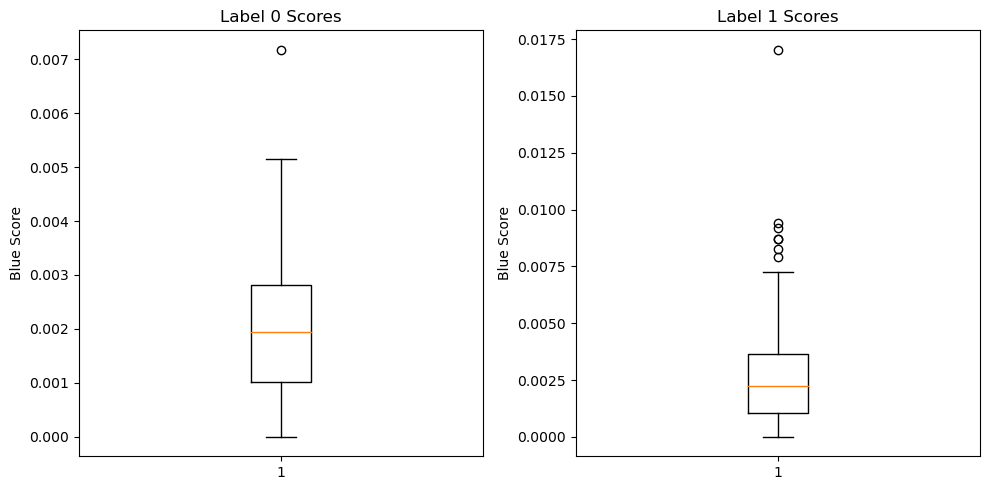

In [12]:
import matplotlib.pyplot as plt


# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create box plot for label 0 scores
axs[0].boxplot(bleu_label_0)
axs[0].set_title('Label 0 Scores')
axs[0].set_ylabel('Blue Score')

# Create box plot for label 1 scores
axs[1].boxplot(bleu_label_1)
axs[1].set_title('Label 1 Scores')
axs[1].set_ylabel('Blue Score')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


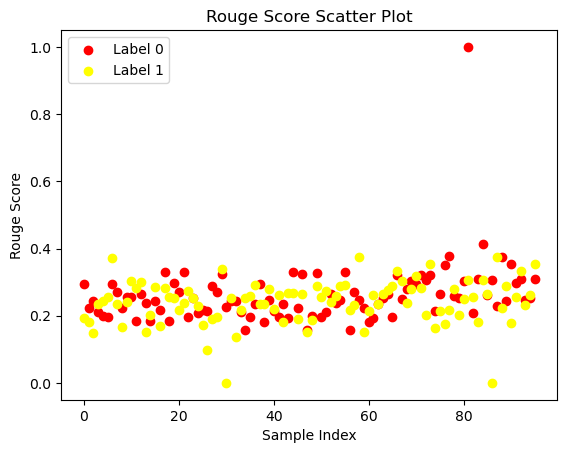

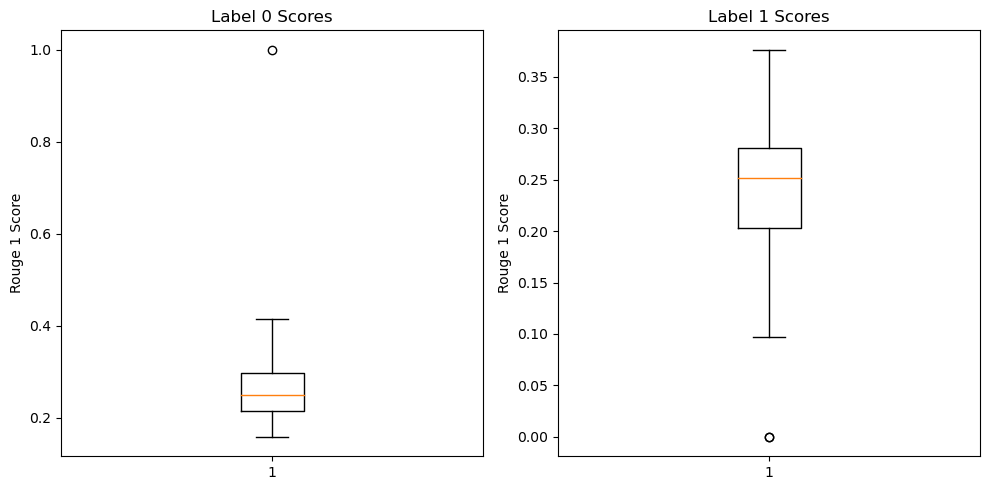

In [13]:
# scatter plot and boxplot for rouge_1

import matplotlib.pyplot as plt
rouge_1_label_0 = dataset.loc[dataset['Label'] == 0, 'rouge_1']
rouge_1_label_1 = dataset.loc[dataset['Label'] == 1, 'rouge_1']


# Create scatter plot
plt.scatter(range(len(rouge_1_label_0)), rouge_1_label_0, color='red', label='Label 0')
plt.scatter(range(len(rouge_1_label_1)), rouge_1_label_1, color='yellow', label='Label 1')

# Set plot title and labels
plt.title('Rouge Score Scatter Plot')
plt.xlabel('Sample Index')
plt.ylabel('Rouge Score')

# Show legend
plt.legend()

# Show the plot
plt.show()


import matplotlib.pyplot as plt


# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create box plot for label 0 scores
axs[0].boxplot(rouge_1_label_0)
axs[0].set_title('Label 0 Scores')
axs[0].set_ylabel('Rouge 1 Score')

# Create box plot for label 1 scores
axs[1].boxplot(rouge_1_label_1)
axs[1].set_title('Label 1 Scores')
axs[1].set_ylabel('Rouge 1 Score')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


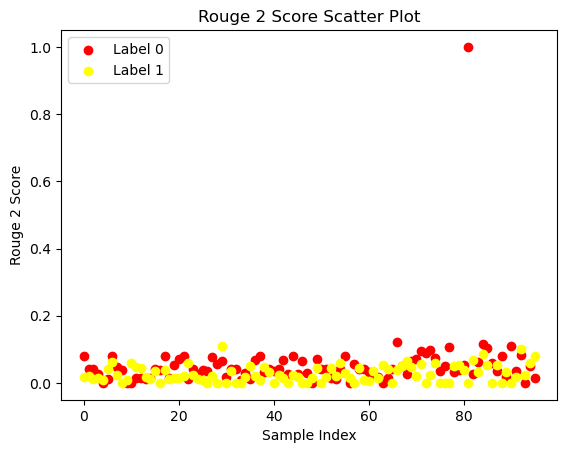

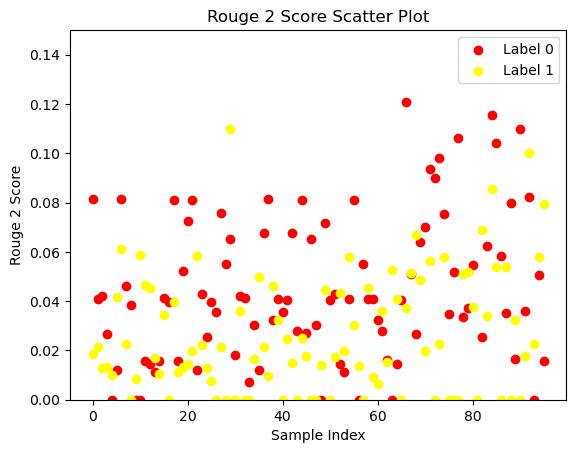

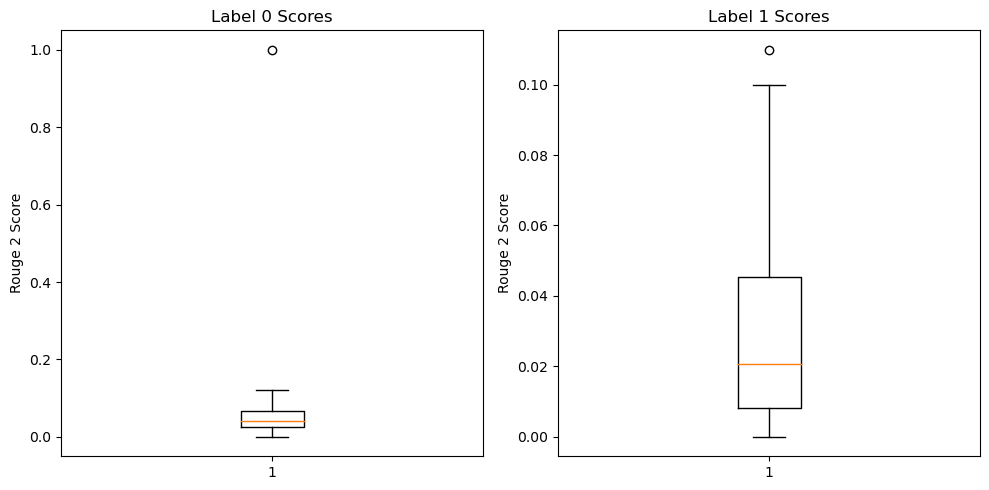

In [14]:
# scatter plot and boxplot for rouge_2

import matplotlib.pyplot as plt
rouge_2_label_0 = dataset.loc[dataset['Label'] == 0, 'rouge_2']
rouge_2_label_1 = dataset.loc[dataset['Label'] == 1, 'rouge_2']


# Create scatter plot
plt.scatter(range(len(rouge_2_label_0)), rouge_2_label_0, color='red', label='Label 0')
plt.scatter(range(len(rouge_2_label_1)), rouge_2_label_1, color='yellow', label='Label 1')

# Set plot title and labels
plt.title('Rouge 2 Score Scatter Plot')
plt.xlabel('Sample Index')
plt.ylabel('Rouge 2 Score')

# Show legend
plt.legend()

# Show the plot
plt.show()



# new scatter plot to zoom in the values 

# Set y-axis limits
plt.ylim(0.0, 0.15)

# Create scatter plot
plt.scatter(range(len(rouge_2_label_0)), rouge_2_label_0, color='red', label='Label 0')
plt.scatter(range(len(rouge_2_label_1)), rouge_2_label_1, color='yellow', label='Label 1')

# Set plot title and labels
plt.title('Rouge 2 Score Scatter Plot')
plt.xlabel('Sample Index')
plt.ylabel('Rouge 2 Score')

# Show legend
plt.legend()

# Show the plot
plt.show()

import matplotlib.pyplot as plt


# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create box plot for label 0 scores
axs[0].boxplot(rouge_2_label_0)
axs[0].set_title('Label 0 Scores')
axs[0].set_ylabel('Rouge 2 Score')

# Create box plot for label 1 scores
axs[1].boxplot(rouge_2_label_1)
axs[1].set_title('Label 1 Scores')
axs[1].set_ylabel('Rouge 2 Score')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


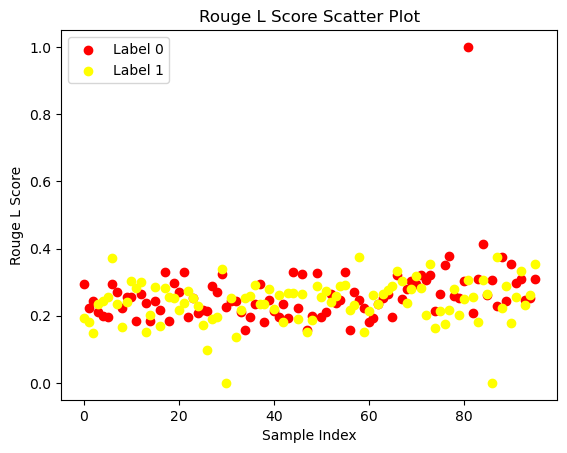

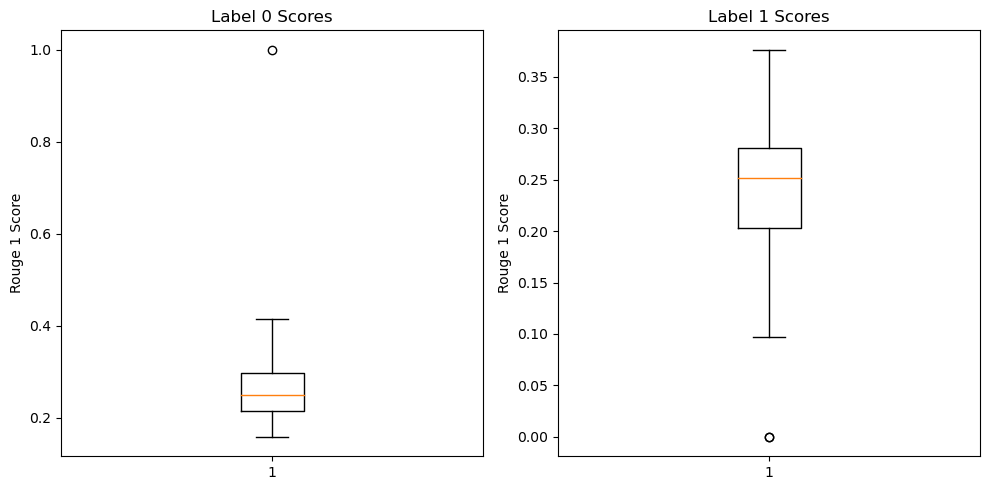

In [15]:
# scatter plot and boxplot for rouge_L

import matplotlib.pyplot as plt
rouge_L_label_0 = dataset.loc[dataset['Label'] == 0, 'rouge_1']
rouge_L_label_1 = dataset.loc[dataset['Label'] == 1, 'rouge_1']


# Create scatter plot
plt.scatter(range(len(rouge_L_label_0)), rouge_L_label_0, color='red', label='Label 0')
plt.scatter(range(len(rouge_L_label_1)), rouge_L_label_1, color='yellow', label='Label 1')

# Set plot title and labels
plt.title('Rouge L Score Scatter Plot')
plt.xlabel('Sample Index')
plt.ylabel('Rouge L Score')

# Show legend
plt.legend()

# Show the plot
plt.show()


import matplotlib.pyplot as plt


# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Create box plot for label 0 scores
axs[0].boxplot(rouge_L_label_0)
axs[0].set_title('Label 0 Scores')
axs[0].set_ylabel('Rouge 1 Score')

# Create box plot for label 1 scores
axs[1].boxplot(rouge_L_label_1)
axs[1].set_title('Label 1 Scores')
axs[1].set_ylabel('Rouge 1 Score')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
# preprocessed. a new column will be created in the dataset to save the lemmas of each text in a new column named Lemmas. 

# installed inusing terminal python -m spacy download el_core_news_sm

import string
import spacy
from nltk.tokenize import word_tokenize

# Load the Spacy Greek language model
spacy = spacy.load("el_core_news_sm")

# Function to remove punctuation from a text string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text

def lemmatize_tokens(tokens):
    text = spacy(" ".join(tokens))  # the list of tokens to a string
    lemmas = [token.lemma_ for token in text]
    return lemmas


# Convert text to lowercase
dataset["Text"] = dataset["Text"].str.lower()

# Remove punctuation from the text
dataset["Text"] = dataset["Text"].apply(remove_punctuation)

# Tokenize the text in each row
dataset["Tokens"] = dataset["Text"].apply(word_tokenize)

# Lemmatize the tokens in each row
dataset["Lemmas"] = dataset["Tokens"].apply(lemmatize_tokens)

# Print the lemmas for the first row as an example
print(dataset["Lemmas"].iloc[0])

# Print a row to check everything is ok 
print(dataset.iloc[0])

['\ufeffλοιπον', 'ο', 'βασικός', 'μερη', 'ο', 'εγώ', 'ο', 'βασικος', 'μου', 'μέριμνα', 'είμαι', 'ο', 'φροντίδα', 'ο', 'εαυτός', 'μου', 'ο', 'ένας', 'τηλεφωνώ', 'ο', 'άλλος', 'θαυμάζω', 'ο', 'γυναίκα', 'μου', 'που', 'κάνω', 'ο', 'δουλειά', 'που', 'γλίτωσε', 'ο', 'κούρεμα', 'λοιπόν', 'πάμε', 'τι', 'θες', 'να', 'σου', 'λέγω', 'να', 'σου', 'περιγράψω', 'και', 'ο', 'παιδί', 'προσπαθώ', 'να', 'διασκεδάσουν', 'αυτους', 'με', 'ο', 'με', 'ο', 'βρίσκονταςς', 'που', 'είμαι', 'ο', 'γλυκά', 'και', 'τρώγω', 'ο', 'ο', 'γλυκα', 'λοιπόν', 'τι', 'θα', 'γίνομαι', 'όταν', 'θα', 'γυρίζω', 'μέσα', 'ο', 'γυναίκα', 'και', 'θα', 'εγώ', 'λέγω', 'να', 'σφουγγαρίω', 'και', 'και', 'θα', 'της', 'λέγω', 'αυτός', 'αυτός', 'είμαι', 'δικιά', 'σου', 'δουλειά', 'δεν', 'είμαι', 'δικός', 'μου', 'και', 'θα', 'γίνομαι', 'ο', 'έλα', 'να', 'δεις', 'λοιπον', 'ο', 'σκυλί', 'και', 'έχω', 'και', 'ένας', 'σκυλί', 'εδώ', 'που', 'τρώει', 'ο', 'αποφάγια', 'ο', 'φυσιολογικός', 'φυσιολογικός', 'σκυλι', 'προφανως', 'που', 'τρώει', 'ο', '

In [17]:
#cheking the data types

print(dataset.dtypes)



    
#check for nnan values
print(dataset['bleu_score'].isnull().sum())
print(dataset["rouge_1"].isnull().sum())
print(dataset["rouge_2"].isnull().sum())
print(dataset["rouge_L"].isnull().sum())

dataset['bleu_score'] = dataset['bleu_score'].astype(float)
dataset['rouge_1'] = dataset['rouge_1'].astype(float)
dataset['rouge_2'] = dataset['rouge_2'].astype(float)
dataset['rouge_L'] = dataset['rouge_L'].astype(float)

print(dataset.dtypes)


Text          object
Label          int64
Tokens        object
bleu_score    object
rouge_1       object
rouge_2       object
rouge_L       object
Lemmas        object
dtype: object
0
0
0
0
Text           object
Label           int64
Tokens         object
bleu_score    float64
rouge_1       float64
rouge_2       float64
rouge_L       float64
Lemmas         object
dtype: object


In [18]:
#this path is using semi-preprocessed data and bag of words

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# [['Label', 'bleu_score', 'rouge_1', 'rouge_2', 'rouge_L',
run_1 = dataset[['bleu_score', 'rouge_1', 'rouge_2', 'rouge_L']]
tokens = dataset["Tokens"].copy()
y = dataset["Label"]

#bag of words
# Countvec expects a single string. The tokens will be converted from list to string.
tokens_bow = [' '.join(tokens) for tokens in tokens]


vectorizer = CountVectorizer()
tokens_bow = vectorizer.fit_transform(tokens_bow)


from scipy.sparse import hstack

X_combined = hstack((run_1, tokens_bow))

#splitting

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_combined, y, test_size=0.2, random_state=42)

#naive bayes
nb_classifier = MultinomialNB()

# training
nb_classifier.fit(X_train1, y_train1)

# predicting
y_pred_nb_1 = nb_classifier.predict(X_test1)

# evaluation

accuracy_nb_1 = accuracy_score(y_test1, y_pred_nb_1)
confusion_matrix_nb_1 = confusion_matrix(y_test1, y_pred_nb_1)

# sns.heatmap(confusion_matrix_nb_1, annot=True, cmap="Blues", fmt="d")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Confusion Matrix - Naive Bayes")
# plt.show()

from sklearn.linear_model import LogisticRegression


# logistic regression 
logreg_classifier = LogisticRegression()

logreg_classifier.fit(X_train1, y_train1)

y_pred_log_1 = logreg_classifier.predict(X_test1)


accuracy_logreg_1 = accuracy_score(y_test1, y_pred_log_1)
confusion_matrix__logreg_1 = confusion_matrix(y_test1, y_pred_log_1)

from sklearn.svm import SVC
# smv linear
svm_classifier = SVC()
svm_classifier.fit(X_train1, y_train1)

svm_y_pred_1 = svm_classifier.predict(X_test1)
svm_accuracy_1 = accuracy_score(y_test1, svm_y_pred_1)
svm_confusion_matrix_1 = confusion_matrix(y_test1, svm_y_pred_1)

from sklearn.ensemble import RandomForestClassifier

# random forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train1, y_train1)

rf_y_pred_1 = rf_classifier.predict(X_test1)
rf_accuracy_1 = accuracy_score(y_test1, rf_y_pred_1)
rf_confusion_matrix_1 = confusion_matrix(y_test1, rf_y_pred_1)

#neuarl network
!pip install tensorflow
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scipy.sparse import csr_matrix


# defining the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train1.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# Convert sparse matrices to dense arrays
X_train_dense1 = X_train1.toarray()
X_test_dense1 = X_test1.toarray()

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_dense1, y_train1, epochs=20, batch_size=32)

loss_1, accuracy_1 = model.evaluate(X_test_dense1, y_test1)

y_pred_prob_nn_1 = model.predict(X_test_dense1)
y_pred_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

confusion_matrix_nn_1 = confusion_matrix(y_test1, y_pred_nn_1)


from sklearn.dummy import DummyClassifier

# dummy classifier
dummy_classifier = DummyClassifier(strategy="most_frequent")

dummy_classifier.fit(X_train1, y_train1)

dummy_y_pred_1 = dummy_classifier.predict(X_test1)

dummy_accuracy_1 = accuracy_score(y_test1, dummy_y_pred_1)
dummy_confusion_matrix_1 = confusion_matrix(y_test1, dummy_y_pred_1)


Epoch 1/20
5/5 [==============================] - 1s 5ms/step - loss: 0.7082 - accuracy: 0.5359
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.7059
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7778
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8693
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.9020
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2936 - accuracy: 0.9477
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2729 - accuracy: 0.9542
Epoch 8/20
5/5 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.9608
Epoch 9/20
5/5 [==============================] - 0s 4ms/step - loss: 0.2078 - accuracy: 0.9739
Epoch 10/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2071 - accuracy: 0.9477
Epoch 11/20
5/5 [======================

In [19]:
#this path is using preprocessed data and bag of words

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# [['Label', 'bleu_score', 'rouge_1', 'rouge_2', 'rouge_L',
run_2 = dataset[['bleu_score', 'rouge_1', 'rouge_2', 'rouge_L']]
lemmas = dataset["Lemmas"].copy()
y = dataset["Label"]

#bag of words
# Countvec expects a single string. The tokens will be converted from list to string.
lemmas_bow = [' '.join(tokens) for tokens in tokens]


vectorizer = CountVectorizer()
lemmas_bow = vectorizer.fit_transform(lemmas_bow)


from scipy.sparse import hstack

X_combined_2 = hstack((run_2, lemmas_bow))


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_combined_2, y, test_size=0.2, random_state=42)

#naive bayes
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train2, y_train2)

y_pred_nb_2 = nb_classifier.predict(X_test2)


accuracy_nb_2 = accuracy_score(y_test2, y_pred_nb_2)
confusion_matrix_nb_2 = confusion_matrix(y_test1, y_pred_nb_2)


from sklearn.linear_model import LogisticRegression


# logistic regression 
logreg_classifier = LogisticRegression()

logreg_classifier.fit(X_train2, y_train2)

y_pred_log_2 = logreg_classifier.predict(X_test2)

accuracy_logreg_2 = accuracy_score(y_test2, y_pred_log_2)
confusion_matrix__logreg_2 = confusion_matrix(y_test2, y_pred_log_2)

from sklearn.svm import SVC
# smv linear
svm_classifier = SVC()
svm_classifier.fit(X_train2, y_train2)

svm_y_pred_2 = svm_classifier.predict(X_test2)
svm_accuracy_2 = accuracy_score(y_test2, svm_y_pred_2)
svm_confusion_matrix_2 = confusion_matrix(y_test2, svm_y_pred_2)

from sklearn.ensemble import RandomForestClassifier

# random forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train2, y_train2)

rf_y_pred_2 = rf_classifier.predict(X_test2)
rf_accuracy_2 = accuracy_score(y_test2, rf_y_pred_2)
rf_confusion_matrix_2 = confusion_matrix(y_test2, rf_y_pred_2)

#neuarl network
!pip install tensorflow
import numpy as np


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scipy.sparse import csr_matrix


# defining the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train2.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# converting sparse matrices to dense arrays
X_train_dense2 = X_train2.toarray()
X_test_dense2 = X_test2.toarray()

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_dense2, y_train2, epochs=20, batch_size=32)

loss_2, accuracy_2 = model.evaluate(X_test_dense2, y_test2)

y_pred_prob_nn_2 = model.predict(X_test_dense2)
#probabilities to predictions
y_pred_nn_2 = (y_pred_prob_nn_2 > 0.5).astype(int)

confusion_matrix_nn_2 = confusion_matrix(y_test2, y_pred_nn_2)


from sklearn.dummy import DummyClassifier

# dummy classifier
dummy_classifier = DummyClassifier(strategy="most_frequent")

dummy_classifier.fit(X_train2, y_train2)

dummy_y_pred_2 = dummy_classifier.predict(X_test2)

dummy_accuracy_2 = accuracy_score(y_test2, dummy_y_pred_2)
dummy_confusion_matrix_2 = confusion_matrix(y_test2, dummy_y_pred_2)


Epoch 1/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7206 - accuracy: 0.5817
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 0.5374 - accuracy: 0.7451
Epoch 3/20
5/5 [==============================] - 0s 4ms/step - loss: 0.4222 - accuracy: 0.8301
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 0.3692 - accuracy: 0.8562
Epoch 5/20
5/5 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.8954
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2730 - accuracy: 0.9346
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.9150
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2126 - accuracy: 0.9412
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9412
Epoch 10/20
5/5 [==============================] - 0s 4ms/step - loss: 0.1835 - accuracy: 0.9673
Epoch 11/20
5/5 [======================

In [20]:
# this path is using preprocessed data and word embeddings

import gensim.downloader as api
import pandas as pd
import numpy as np

run_2 = dataset[['bleu_score', 'rouge_1', 'rouge_2', 'rouge_L']]
lemmas = dataset["Lemmas"].copy()
y = dataset["Label"]

# Download the Greek word2vec model trained on Twitter data
model = api.load('glove-twitter-25')

#def created to handle cases of unknwon words
def get_word_vector(word):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)  

#  word embeddings for lemmas
lemma_embeddings = dataset['Lemmas'].apply(lambda lemmas: np.mean([get_word_vector(word) for word in lemmas], axis=0))

#  word embeddings to a dense matrix
lemma_embeddings_matrix = np.vstack(lemma_embeddings.to_numpy())

# dataframe for the lemma embeddings
lemma_embeddings_data = pd.DataFrame(lemma_embeddings_matrix, columns=[f'emb_{i}' for i in range(model.vector_size)])

# concatenating feautre dataframe and embeddings dataframe
X_combined_4 = pd.concat([run_2, lemma_embeddings_data], axis=1)

# splitting
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_combined_4, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

#due to negative values naive bayes classifier is not used
# logistic regression 
logreg_classifier = LogisticRegression()

logreg_classifier.fit(X_train4, y_train4)

y_pred_log_4 = logreg_classifier.predict(X_test4)

accuracy_logreg_4 = accuracy_score(y_test4, y_pred_log_4)
confusion_matrix__logreg_4 = confusion_matrix(y_test4, y_pred_log_4)

from sklearn.svm import SVC
# smv linear
svm_classifier = SVC()
svm_classifier.fit(X_train4, y_train4)

svm_y_pred_4 = svm_classifier.predict(X_test4)
svm_accuracy_4 = accuracy_score(y_test4, svm_y_pred_4)
svm_confusion_matrix_4 = confusion_matrix(y_test4, svm_y_pred_4)

from sklearn.ensemble import RandomForestClassifier
# random forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train4, y_train4)

rf_y_pred_4 = rf_classifier.predict(X_test4)
rf_accuracy_4 = accuracy_score(y_test4, rf_y_pred_4)
rf_confusion_matrix_4 = confusion_matrix(y_test4, rf_y_pred_4)

#neuarl network
!pip install tensorflow
import numpy as np


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scipy.sparse import csr_matrix


# defining the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train4.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# compling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train4, y_train4, epochs=20, batch_size=32)

loss_4, accuracy_4 = model.evaluate(X_test4, y_test4)

y_pred_4 = (model.predict(X_test4) > 0.5).astype(int)
confusion_matrix_nn_4 = confusion_matrix(y_test4, y_pred_4)

from sklearn.dummy import DummyClassifier

# dummy classifier
dummy_classifier = DummyClassifier(strategy="most_frequent")

dummy_classifier.fit(X_train4, y_train4)

dummy_y_pred_4 = dummy_classifier.predict(X_test4)

dummy_accuracy_4 = accuracy_score(y_test4, dummy_y_pred_4)
dummy_confusion_matrix_4 = confusion_matrix(y_test4, dummy_y_pred_4)


Epoch 1/20
5/5 [==============================] - 1s 3ms/step - loss: 0.7569 - accuracy: 0.4575
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7377 - accuracy: 0.4706
Epoch 3/20
5/5 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.6275
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7359 - accuracy: 0.4444
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7318 - accuracy: 0.4706
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.5686
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.5490
Epoch 8/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7171 - accuracy: 0.4314
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5752
Epoch 10/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7255 - accuracy: 0.4771
Epoch 11/20
5/5 [======================

In [21]:
# this path is using semi-preprocessed data and word embeddings

import gensim.downloader as api
import pandas as pd
import numpy as np

run_1 = dataset[['bleu_score', 'rouge_1', 'rouge_2', 'rouge_L']]
tokens = dataset["Tokens"].copy()
y = dataset["Label"]

# Download the Greek word2vec model trained on Twitter data
model = api.load('glove-twitter-25')

#def created to handle cases of unknwon words
def get_word_vector(word):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)  

#  word embeddings for tokens
tokens_embeddings = dataset['Tokens'].apply(lambda tokens: np.mean([get_word_vector(word) for word in tokens], axis=0))

#  word embeddings to a dense matrix
tokens_embeddings_matrix = np.vstack(tokens_embeddings.to_numpy())

# dataframe for the tokens embeddings
tokens_embeddings_data = pd.DataFrame(tokens_embeddings_matrix, columns=[f'emb_{i}' for i in range(model.vector_size)])

# concatenating feautre dataframe and embeddings dataframe
X_combined_3 = pd.concat([run_1, tokens_embeddings_data], axis=1)

# splitting
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_combined_3, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression

#due to negative values naive bayes classifier is not used
# logistic regression 
logreg_classifier = LogisticRegression()

# training
logreg_classifier.fit(X_train3, y_train3)

# predicting
y_pred_log_3 = logreg_classifier.predict(X_test3)

# evaluation
accuracy_logreg_3 = accuracy_score(y_test3, y_pred_log_3)
report_logreg_3 = classification_report(y_test3, y_pred_log_3)
confusion_matrix__logreg_3 = confusion_matrix(y_test3, y_pred_log_3)


from sklearn.svm import SVC
# smv linear
svm_classifier = SVC()
svm_classifier.fit(X_train3, y_train3)

svm_y_pred_3 = svm_classifier.predict(X_test3)
svm_accuracy_3 = accuracy_score(y_test3, svm_y_pred_3)
svm_confusion_matrix_3 = confusion_matrix(y_test3, svm_y_pred_3)

from sklearn.ensemble import RandomForestClassifier
# random forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train3, y_train3)

rf_y_pred_3 = rf_classifier.predict(X_test3)
rf_accuracy_3 = accuracy_score(y_test3, rf_y_pred_3)
rf_confusion_matrix_3 = confusion_matrix(y_test3, rf_y_pred_3)

#neuarl network
!pip install tensorflow
import numpy as np


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scipy.sparse import csr_matrix


# defining the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train4.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


# compling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train3, y_train3, epochs=20, batch_size=32)

# Evaluate the model

loss_3, accuracy_3 = model.evaluate(X_test3, y_test3)
y_pred_3 = (model.predict(X_test3) > 0.5).astype(int)
confusion_matrix_nn_3 = confusion_matrix(y_test3, y_pred_3)

from sklearn.dummy import DummyClassifier

# Create a Dummy Classifier
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Fit the classifier on the training data
dummy_classifier.fit(X_train3, y_train3)

# Predict using the trained classifier
dummy_y_pred_3 = dummy_classifier.predict(X_test3)

# Evaluate the classifier
dummy_accuracy_3 = accuracy_score(y_test3, dummy_y_pred_3)
dummy_confusion_matrix_3 = confusion_matrix(y_test3, dummy_y_pred_3)



Epoch 1/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7545 - accuracy: 0.4248
Epoch 2/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7061 - accuracy: 0.5621
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5294
Epoch 4/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7117 - accuracy: 0.4641
Epoch 5/20
5/5 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.5229
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7111 - accuracy: 0.4837
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4771
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.5752
Epoch 9/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5556
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5229
Epoch 11/20
5/5 [======================

evaluation of semi-preprocessed data using bag of words
Naive Bayes
Accuracy: 0.6923076923076923


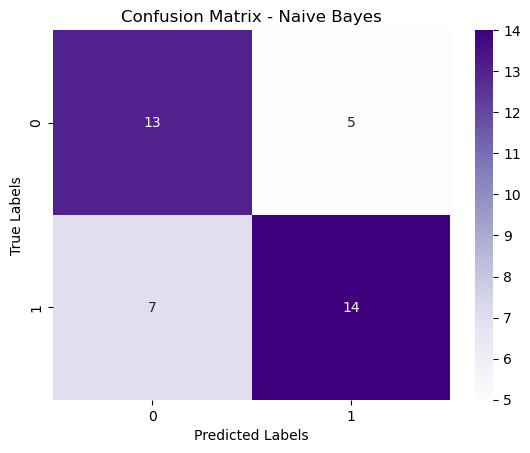

Logistic Regression
Accuracy: 0.7435897435897436


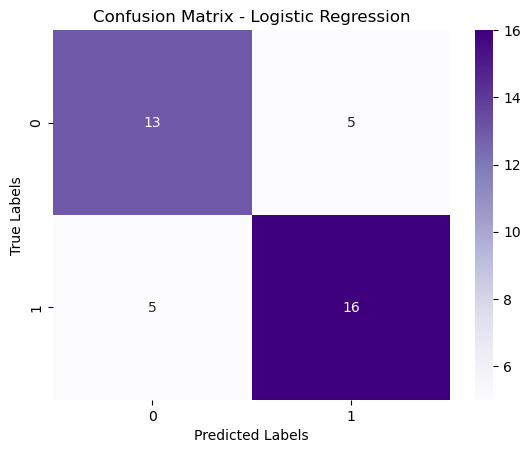

SVM Classifier
Accuracy: 0.717948717948718


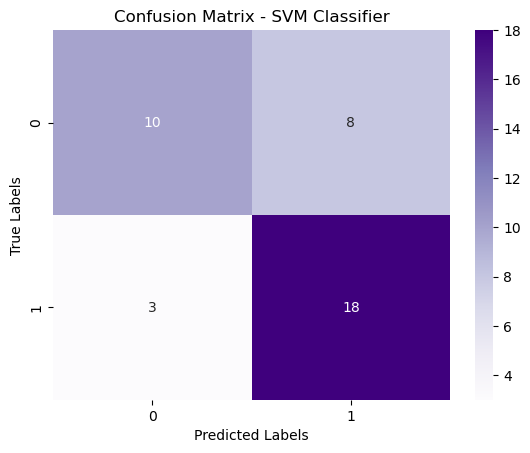

Random Forest Classifier
Accuracy: 0.8461538461538461


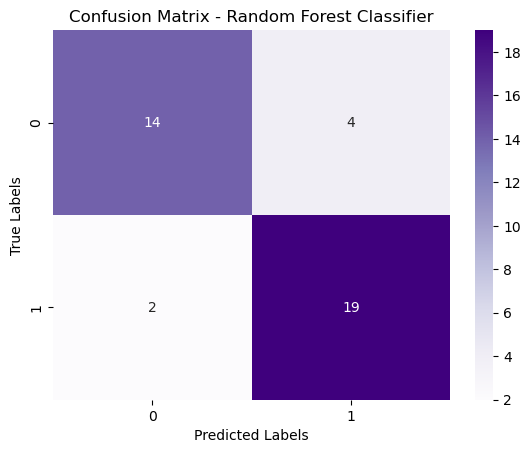

Neural Network Classifier
Accuracy: 0.8205128312110901


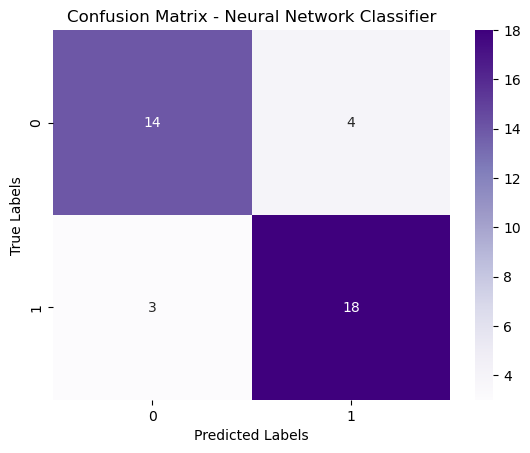

Dummy Classifier
Accuracy: 0.46153846153846156


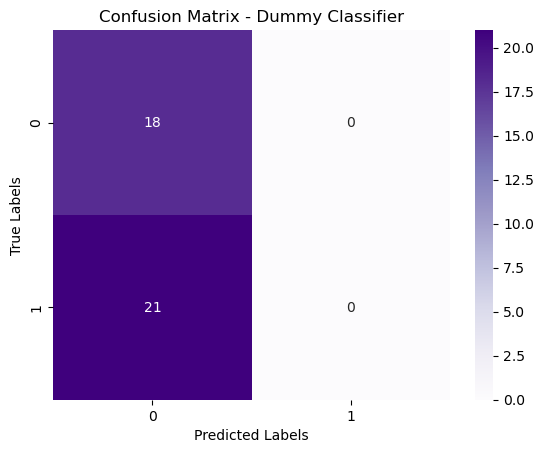

In [22]:
# evaluation of semipreprocessed data using bag of words

import seaborn as sns

print("evaluation of semi-preprocessed data using bag of words")
#naive bayes evaluation
print("Naive Bayes")
print("Accuracy:", accuracy_nb_1)

sns.heatmap(confusion_matrix_nb_1, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


#logistic regression
print("Logistic Regression")
print("Accuracy:", accuracy_logreg_1)
sns.heatmap(confusion_matrix__logreg_1, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#svm 
print("SVM Classifier")
print("Accuracy:", svm_accuracy_1)
sns.heatmap(svm_confusion_matrix_1, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

#random forest 
print("Random Forest Classifier")
print("Accuracy:", rf_accuracy_1)
sns.heatmap(rf_confusion_matrix_1, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

#neural Network
print("Neural Network Classifier")
print("Accuracy:", accuracy_1)
sns.heatmap(confusion_matrix_nn_1, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Neural Network Classifier")
plt.show()

#dummy classifier
print("Dummy Classifier")
print("Accuracy:", dummy_accuracy_1)
sns.heatmap(dummy_confusion_matrix_1, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Dummy Classifier")
plt.show()



evaluation of preprocessed data using bag of words
Naive Bayes
Accuracy: 0.6923076923076923


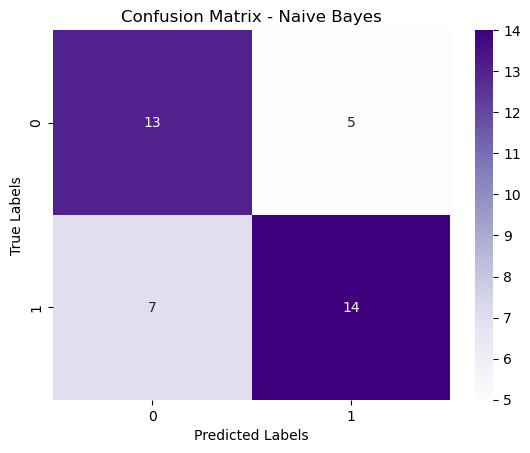

Logistic Regression
Accuracy: 0.7435897435897436


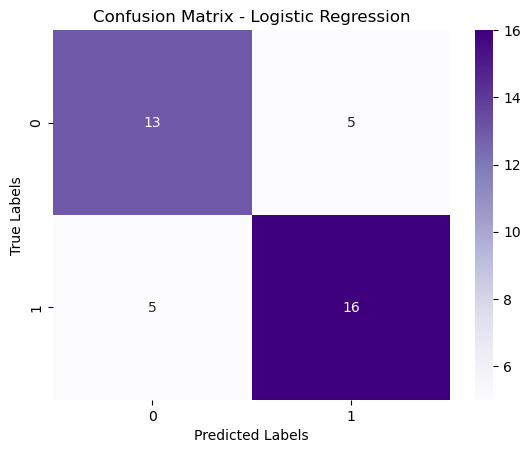

SVM Classifier
Accuracy: 0.717948717948718


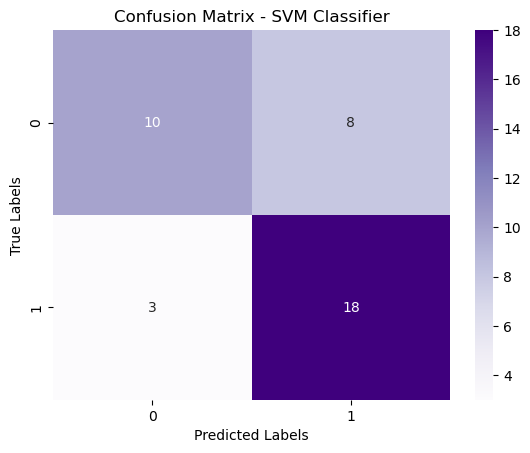

Random Forest Classifier
Accuracy: 0.8205128205128205


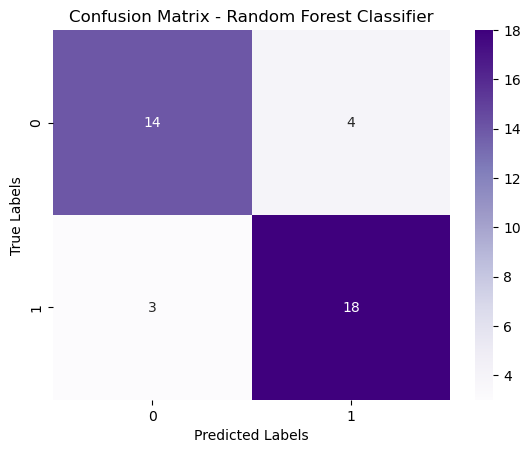

Neural Network Classifier
Accuracy: 0.7948718070983887


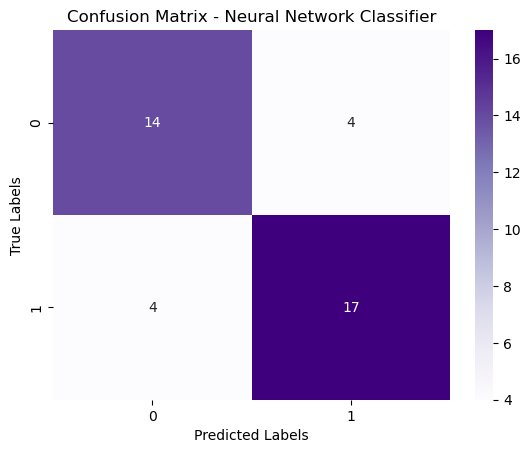

Dummy Classifier
Accuracy: 0.46153846153846156


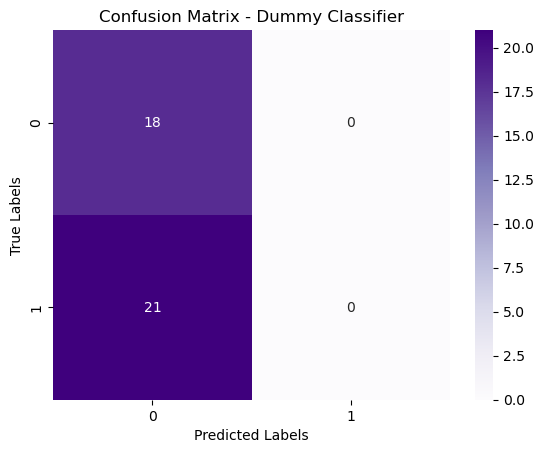

In [23]:
# evaluation of preprocessed data using bag of words

import seaborn as sns

print("evaluation of preprocessed data using bag of words")
#naive bayes evaluation
print("Naive Bayes")
print("Accuracy:", accuracy_nb_2)

sns.heatmap(confusion_matrix_nb_2, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


#logistic regression
print("Logistic Regression")
print("Accuracy:", accuracy_logreg_2)
sns.heatmap(confusion_matrix__logreg_2, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#svm 
print("SVM Classifier")
print("Accuracy:", svm_accuracy_2)
sns.heatmap(svm_confusion_matrix_2, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

#random forest 
print("Random Forest Classifier")
print("Accuracy:", rf_accuracy_2)
sns.heatmap(rf_confusion_matrix_2, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

#neural Network
print("Neural Network Classifier")
print("Accuracy:", accuracy_2)
sns.heatmap(confusion_matrix_nn_2, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Neural Network Classifier")
plt.show()

#dummy classifier
print("Dummy Classifier")
print("Accuracy:", dummy_accuracy_2)
sns.heatmap(dummy_confusion_matrix_2, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Dummy Classifier")
plt.show()



evaluation of semi-processed data using bag of words
Logistic Regression
Accuracy: 0.5897435897435898


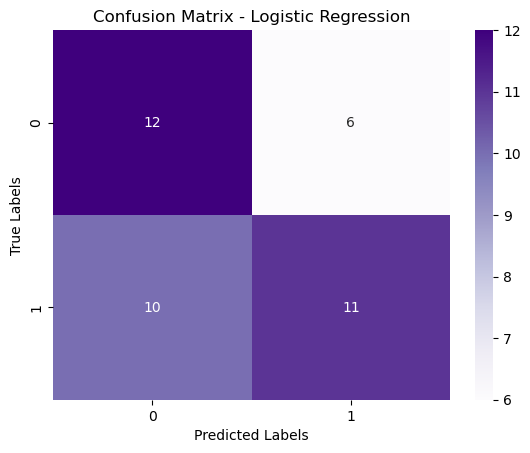

SVM Classifier
Accuracy: 0.6153846153846154


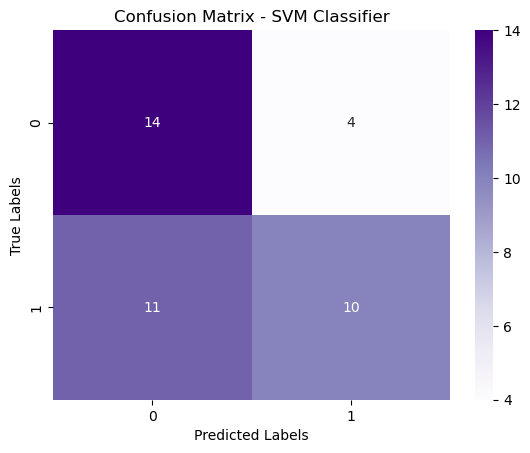

Random Forest Classifier
Accuracy: 0.8205128205128205


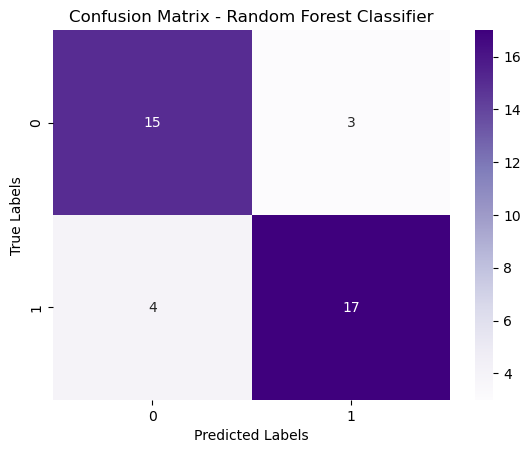

Neural Network Classifier
Accuracy: 0.6153846383094788


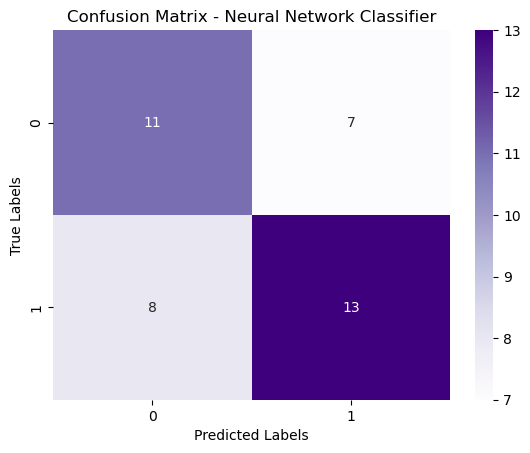

Dummy Classifier
Accuracy: 0.46153846153846156


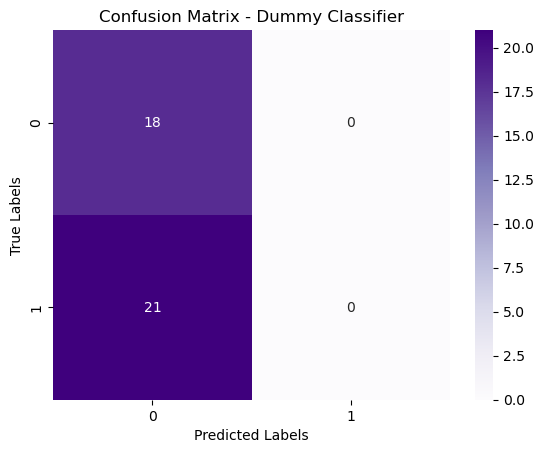

In [24]:
# evaluation of semipreprocessed data using word embeddings

import seaborn as sns

print("evaluation of semi-processed data using bag of words")

#logistic regression
print("Logistic Regression")
print("Accuracy:", accuracy_logreg_3)
sns.heatmap(confusion_matrix__logreg_3, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#svm 
print("SVM Classifier")
print("Accuracy:", svm_accuracy_3)
sns.heatmap(svm_confusion_matrix_3, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

#random forest 
print("Random Forest Classifier")
print("Accuracy:", rf_accuracy_3)
sns.heatmap(rf_confusion_matrix_3, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

#neural Network
print("Neural Network Classifier")
print("Accuracy:", accuracy_3)
sns.heatmap(confusion_matrix_nn_3, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Neural Network Classifier")
plt.show()

#dummy classifier
print("Dummy Classifier")
print("Accuracy:", dummy_accuracy_3)
sns.heatmap(dummy_confusion_matrix_3, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Dummy Classifier")
plt.show()



evaluation of semi-processed data using bag of words
Logistic Regression
Accuracy: 0.6666666666666666


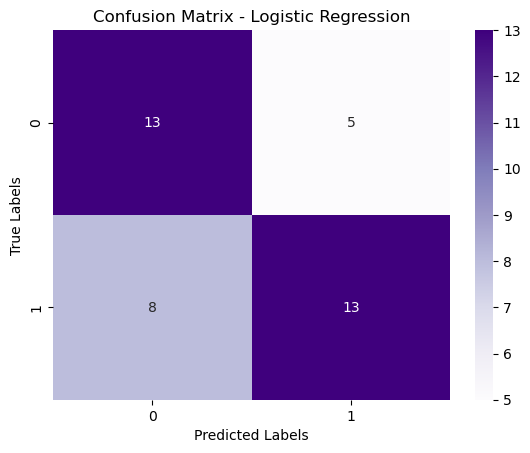

SVM Classifier
Accuracy: 0.7435897435897436


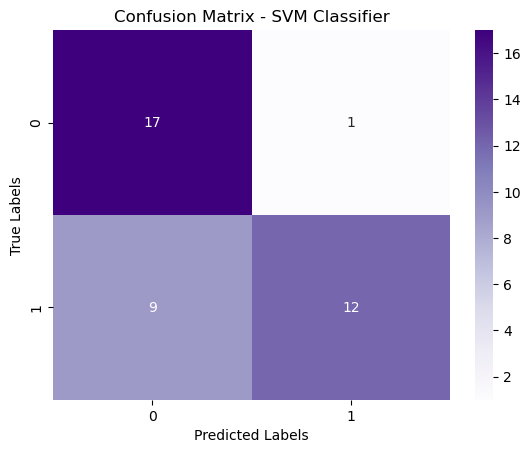

Random Forest Classifier
Accuracy: 0.7948717948717948


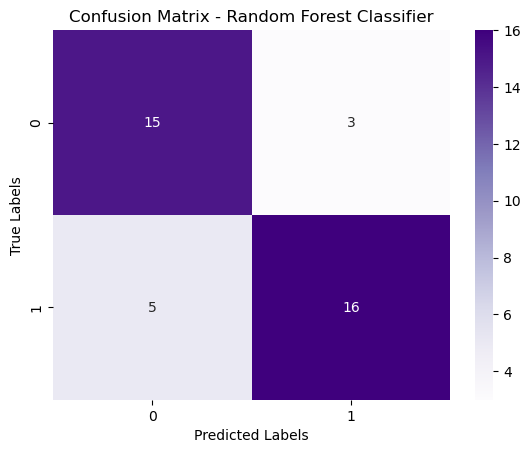

Neural Network Classifier
Accuracy: 0.692307710647583


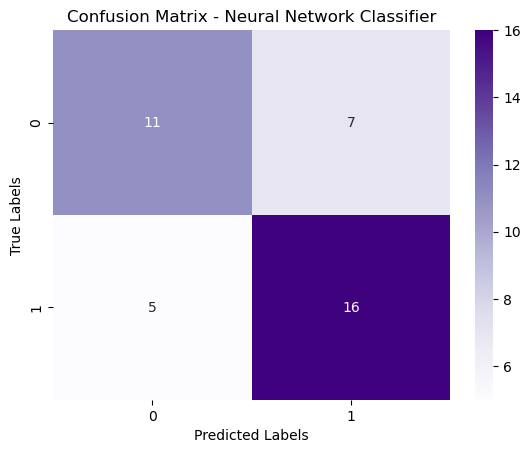

Dummy Classifier
Accuracy: 0.46153846153846156


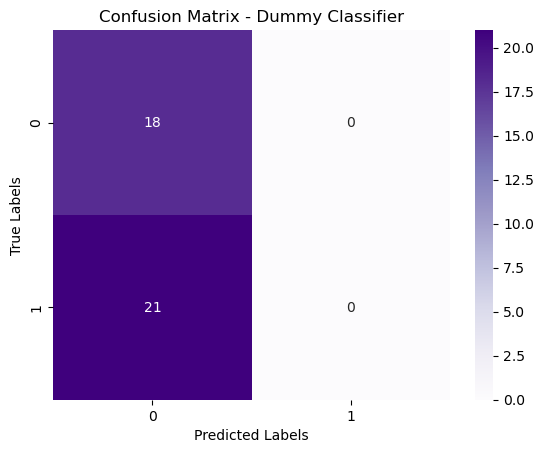

In [25]:
# evaluation of preprocessed data using word embeddings

import seaborn as sns

print("evaluation of semi-processed data using bag of words")

#logistic regression
print("Logistic Regression")
print("Accuracy:", accuracy_logreg_4)
sns.heatmap(confusion_matrix__logreg_4, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#svm 
print("SVM Classifier")
print("Accuracy:", svm_accuracy_4)
sns.heatmap(svm_confusion_matrix_4, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

#random forest 
print("Random Forest Classifier")
print("Accuracy:", rf_accuracy_4)
sns.heatmap(rf_confusion_matrix_4, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

#neural Network
print("Neural Network Classifier")
print("Accuracy:", accuracy_4)
sns.heatmap(confusion_matrix_nn_4, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Neural Network Classifier")
plt.show()

#dummy classifier
print("Dummy Classifier")
print("Accuracy:", dummy_accuracy_4)
sns.heatmap(dummy_confusion_matrix_4, annot=True, cmap='Purples')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Dummy Classifier")
plt.show()



In [26]:
# find the 2 models with the best accuracy accross feature extraction methods. dummy classifier is excluded

accuracy_score = {
    'nb_semi_bow': accuracy_nb_1,
    'nb_pre_bow': accuracy_nb_2,
    'logreg_semi_bow': accuracy_logreg_1,
    'logreg_pre_bow': accuracy_logreg_2,
    'logreg_semi_w2v': accuracy_logreg_3,
    'logreg_pre_w2v': accuracy_logreg_4,
    'svm_semi_bow': svm_accuracy_1,
    'svm_pre_bow': svm_accuracy_2,
    'svm_semi_w2v': svm_accuracy_3,
    'svm_pre_w2v': svm_accuracy_4,
    'rf_semi_bow': rf_accuracy_1,
    'rf_pre_bow': rf_accuracy_2,
    'rf_semi_w2v': rf_accuracy_3,
    'rf_pre_w2v': rf_accuracy_4,
    'nn_semi_bow': accuracy_1,
    'nn_pre_bow': accuracy_2,
    'nn_semi_w2v': accuracy_3,
    'nn_pre_w2v': accuracy_4
}

# sorting by score
sorted_models = sorted(accuracy_score.items(), key=lambda x: x[1], reverse=True)

print(sorted_models)




[('rf_semi_bow', 0.8461538461538461), ('nn_semi_bow', 0.8205128312110901), ('rf_pre_bow', 0.8205128205128205), ('rf_semi_w2v', 0.8205128205128205), ('nn_pre_bow', 0.7948718070983887), ('rf_pre_w2v', 0.7948717948717948), ('logreg_semi_bow', 0.7435897435897436), ('logreg_pre_bow', 0.7435897435897436), ('svm_pre_w2v', 0.7435897435897436), ('svm_semi_bow', 0.717948717948718), ('svm_pre_bow', 0.717948717948718), ('nn_pre_w2v', 0.692307710647583), ('nb_semi_bow', 0.6923076923076923), ('nb_pre_bow', 0.6923076923076923), ('logreg_pre_w2v', 0.6666666666666666), ('nn_semi_w2v', 0.6153846383094788), ('svm_semi_w2v', 0.6153846153846154), ('logreg_semi_w2v', 0.5897435897435898)]
